# Python For Data Analysis - Final Exam

## Spring Semester 2021

Instructions:
- Please do all of your work in this Jupyter Notebook, and submit this as your deliverable to CourseWorks.
- No collaboration with your classmates - this is an individual effort.
- Do not import any additional packages then what is in the next cell.
- You can use any number of cells to answer each question.
- Please use comments where applicable and make sure your Notebook runs end-to-end without any issues when you submit it.

### Grading Schema

- total of **120 points**

- 10 points: your Jupyter Notebook runs end-to-end without any exceptions
- 5 points: you added appropriate comments where applicable to help the reader understand your throught process
- Section 1: 35 points
- Section 2: 45 points
- Section 3: 25 points
- the points for each question are listed at the beginning of the problem statement


In [1]:
# note these are the packages you will need for this Exam.
# you should not import any other packages anywhere
import pandas as pd
import matplotlib.pyplot as plt

***
## Section 1

For this section you'll be using the NYTimes Covid dataset for US counties, available on GitHub, at this link.

```{python}
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
```
Note, some of the counties in the NYTimes datasets are not actual counties. For instance, the counties in New York City are: New York County (Manhattan), Kings County (Brooklyn), Bronx County (The Bronx), Richmond County (Staten Island), and Queens County (Queens). But the NYTimes dataset aggregates these counties into one value referred to as "New York City".

***
### Question 1.1
<font color='blue'>[5 points]</font>

Use the function `pd.read_csv` pointing to the url above to download the data to a Pandas DataFrame. Name the DataFrame `df`. Display the shape of the DataFrame. 


In [2]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
import pandas as pd
df = pd.read_csv(url)
df.shape

(1245060, 6)

***
### Question 1.2
<font color='blue'>[5 points]</font>

Use the `tail` function to display the last 3 rows of the DataFrame. 


In [3]:
df.tail(3)

,date,county,state,fips,cases,deaths
1245057,2021-04-21,Uinta,Wyoming,56041.0,2154,12.0
1245058,2021-04-21,Washakie,Wyoming,56043.0,897,26.0
1245059,2021-04-21,Weston,Wyoming,56045.0,647,5.0


***
### Question 1.3
<font color='blue'>[5 points]</font>

Use the `info` function to display information about each column. 


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245060 entries, 0 to 1245059
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   date    1245060 non-null  object 
 1   county  1245060 non-null  object 
 2   state   1245060 non-null  object 
 3   fips    1233669 non-null  float64
 4   cases   1245060 non-null  int64  
 5   deaths  1217641 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 57.0+ MB


***
### Question 1.4
<font color='blue'>[10 points]</font>

Since you might be working on this dataset at different times, let's filter the dataset by date so that we're all working on the same data. 

Notice that the `date` column in df is of type string. We will need to convert this column from string to a datetime object. Use the `pd.to_datetime` function to define a new column named `datetime` that stores the date values in datetime format. 

Filter the DataFrame to store data up to and including `2021-04-10` and print the shape of the new DataFrame. 


In [5]:
df['datetime'] = pd.to_datetime(df['date'])
df.info()
newdf = df[(df['date'] >= '2020-01-21') & (df['date'] <='2021-04-10')]
newdf.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245060 entries, 0 to 1245059
Data columns (total 7 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   date      1245060 non-null  object        
 1   county    1245060 non-null  object        
 2   state     1245060 non-null  object        
 3   fips      1233669 non-null  float64       
 4   cases     1245060 non-null  int64         
 5   deaths    1217641 non-null  float64       
 6   datetime  1245060 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 66.5+ MB


(1209341, 7)

***
### Question 1.5
<font color='blue'>[5 points]</font>

This question has 2 parts:
- Display the top five `states` by number of `cases` on April 10, 2021.
- Disllay the top five `states` by number of `deaths` on April 10, 2021.

Hint: use the `groupby` function to aggregate the cases and deaths by state ON April 10, 2021. (Note this question is asking for data for ONE day.)


In [6]:
date1 = newdf[(newdf['datetime'] =='2021-04-10')]
g1 = date1.groupby('state')['cases'].sum()
g1.nlargest(5)

state
California    3696767
Texas         2825875
Florida       2118705
New York      1948232
Illinois      1280295
Name: cases, dtype: int64

In [7]:
g2 = date1.groupby('state')['deaths'].sum()
g2.nlargest(5)

state
California      60334.0
New York        50527.0
Texas           49345.0
Florida         34013.0
Pennsylvania    25457.0
Name: deaths, dtype: float64

***
### Question 1.6
 <font color='blue'>[5 points]</font>

This question has 2 parts:
 - On April 10, 2021, what are the top 5 counties in California that had the greatest number of cases?
 - On April 10, 2021, what are the top 5 counties in California that had the greatest number of deaths?

Note, similar to the previous question, here we are asking for data for ONE day.

In [8]:
newdf2 = df[(df['datetime']=='2021-04-10')&(df['state']=='California')]
newdf2

,date,county,state,fips,cases,deaths,datetime
1206280,2021-04-10,Alameda,California,6001.0,84469,1446.0,2021-04-10
1206281,2021-04-10,Alpine,California,6003.0,85,0.0,2021-04-10
1206282,2021-04-10,Amador,California,6005.0,3599,46.0,2021-04-10
1206283,2021-04-10,Butte,California,6007.0,11454,193.0,2021-04-10
1206284,2021-04-10,Calaveras,California,6009.0,2028,50.0,2021-04-10
1206285,2021-04-10,Colusa,California,6011.0,2178,16.0,2021-04-10
1206286,2021-04-10,Contra Costa,California,6013.0,66262,777.0,2021-04-10
1206287,2021-04-10,Del Norte,California,6015.0,1245,6.0,2021-04-10
1206288,2021-04-10,El Dorado,California,6017.0,9528,106.0,2021-04-10
1206289,2021-04-10,Fresno,California,6019.0,100027,1630.0,2021-04-10


In [9]:
g3 = newdf2.groupby('county')['cases'].sum()
g3.nlargest(5)

county
Los Angeles       1225916
Riverside          296090
San Bernardino     292558
San Diego          272760
Orange             267957
Name: cases, dtype: int64

In [10]:
g4 = newdf2.groupby('county')['deaths'].sum()
g4.nlargest(5)

county
Los Angeles       23467.0
Orange             4831.0
Riverside          4481.0
San Bernardino     4467.0
San Diego          3600.0
Name: deaths, dtype: float64

***
## Section 2

For this section, you will be using US Census data stored in the `county_2019_population.csv` file. The ultimate goal is to join this dataset to the Covid dataset.

Download the csv file from Courseworks and store it locally on your laptop.

***
### Question 2.1
<font color='blue'>[5 points]</font>

Use the `pd.read_csv` function to load the csv file into memory. Name the DataFrame `pop`. Print the `shape` of the `pop` DataFrame.


In [11]:
pop = pd.read_csv('https://raw.githubusercontent.com/HongyuJiang/homeworks-from-universal/main/county_2019_population.csv')
pop.shape

(3148, 2)

***
### Question 2.2
<font color='blue'>[5 points]</font>

Use the `sample` function to display 10 random rows.


In [12]:
pop.sample(10)

,Geographic Area,Estimated Population 2019
1523,".Harrison County, Missouri","8,352"
2010,".Hettinger County, North Dakota","2,499"
992,".Wyandotte County, Kansas","165,429"
3049,".Barron County, Wisconsin","45,244"
568,".Clearwater County, Idaho","8,756"
2701,".Ochiltree County, Texas","9,836"
647,".Livingston County, Illinois","35,648"
2004,".Emmons County, North Dakota","3,241"
1147,".Natchitoches Parish, Louisiana","38,158"
2683,".Matagorda County, Texas","36,643"


***
### Question 2.3
<font color='blue'>[5 points]</font>

Rename the columns from:
```
Geographic Area -> geographic_area
Estimated Population 2019 -> estimated_population_2019
```
Use the `rename` function using the argument `inplace=True`. Display or print the new columns in `pop`.


In [13]:
pop.rename(columns={'Geographic Area':'geographic_area','Estimated Population 2019':'estimated_population_2019'},inplace = True)
pop.columns

Index(['geographic_area', 'estimated_population_2019'], dtype='object')

***
### Question 2.4
<font color='blue'>[5 points]</font>

If you run `pop.tail(10)`, you'll notice that the last 6 rows of the DataFrame contain footnotes.

Remove the last 6 rows of the DataFrame to remove these footnotes. After removing the rows, print or display the last row of the DataFrame. 

In [14]:
pop = pop[:-6]
# Use the tail function to display the last 6 rows of the pop Dataframe
pop.tail(1)

,geographic_area,estimated_population_2019
3141,".Weston County, Wyoming","6,927"


***
### Question 2.5
<font color='blue'>[15 points]</font>

<font color='blue'> **edit:** In this question, we are going to clean up the value of the geographic_area column. You may notice from looking at the data that the values include the word "County". This is true for the majority of the rows, but not all of the rows. For instance, some of the rows have the words "Municipality" instead of "County". Below, let's remove the word County if it exists in a cell, and do nothing to the cell if County does not exist. </font>

The `geographic_area` column stores both the county name and state name, and it contains some superflous characters: a leading dot, the word "County", and some extra blank spaces.

This question has several parts:
1. define a new column named "county" that stores the county only
2. define a new column named "state" that stores the state only
3. define a new column named "population" that stores the value in `estimated_population_2019` as an integer

Hints: for (1) and (2), use the `pd.Series.str` methods to do the cleaning up of the strings. Note that you can chain a sequence of these commands together. Use the `map` or `apply` method in combination with the `split` method to split these strings up into two columns, "county" and "state".

Hint: for (3), you could use one of the methods in `pd.Series.str` to remove the comma and then convert the string to an integer.

To give you an idea of what you are working towards, here is what the first 3 rows of your DataFrame should look like:

|    | geographic_area   | estimated_population_2019   | county   | state   |   population |
|---:|:------------------|:----------------------------|:---------|:--------|-------------:|
|  0 | Autauga, Alabama  | 55,869                      | Autauga  | Alabama |        55869 |
|  1 | Baldwin, Alabama  | 223,234                     | Baldwin  | Alabama |       223234 |
|  2 | Barbour, Alabama  | 24,686                      | Barbour  | Alabama |        24686 |
|  3 | Bibb, Alabama     | 22,394                      | Bibb     | Alabama |        22394 |


In [15]:
pop["geographic_area"]=pop["geographic_area"].apply(lambda x:x.replace(' County','').replace('.',''))

In [16]:
pop["county"]=pop["geographic_area"].apply(lambda x:x.split(',')[0])

In [17]:
pop["state"]=pop["geographic_area"].apply(lambda x:x.split(',')[1][1:])

In [18]:
pop["population"]=pop["estimated_population_2019"].apply(lambda x:int(x.replace(',','')))

In [19]:
pop.head()

,geographic_area,estimated_population_2019,county,state,population
0,"Autauga, Alabama","55,869",Autauga,Alabama,55869
1,"Baldwin, Alabama","223,234",Baldwin,Alabama,223234
2,"Barbour, Alabama","24,686",Barbour,Alabama,24686
3,"Bibb, Alabama","22,394",Bibb,Alabama,22394
4,"Blount, Alabama","57,826",Blount,Alabama,57826


In [20]:
# New York have different alias in two dataset, should be unified
pop['county'] = pop['county'].replace(['New York'], 'New York City')

***
### Question 2.6
<font color='blue'>[10 points]</font>

Excluding the District of Columbia, aggregate the dataset by state and compute the following:
1. the number of counties
2. minimum population
3. maximum population
4. median population

Store the results in a new DataFrame named `pop_aggs`. Sort `pop_aggs` in descending order by median county population.

Display the first 5 rows. 

Here are the top 3:


|    | state         |   count |   min_pop |   max_pop |   median_pop |
|---:|:--------------|--------:|----------:|----------:|-------------:|
|  0 | Massachusetts |      14 |     11399 |   1611699 |       493787 |
|  1 | New Jersey    |      21 |     62385 |    932202 |       445349 |
|  2 | Delaware      |       3 |    180786 |    558753 |       234225 |


In [21]:
pop_aggs = pop[['state', 'county', 'population']].groupby(['state']).agg(['count', 'min', 'max', 'median']).reset_index(level='state')

In [22]:
pop_aggs.columns = ['state', 'count', 'min_pop', 'max_pop', 'median_pop']

In [23]:
pop_aggs['median_pop'] = pop_aggs['median_pop'].apply(lambda x:int(x))

In [24]:
pop_aggs = pop_aggs[pop_aggs['state'] != 'District of Columbia']

In [25]:
pop_aggs = pop_aggs.sort_values(by='median_pop', ascending=False).head(5)

In [26]:
pop_aggs = pop_aggs.reset_index(drop=True)

In [27]:
pop_aggs.head()

,state,count,min_pop,max_pop,median_pop
0,Massachusetts,14,11399,1611699,493787
1,New Jersey,21,62385,932202,445349
2,Delaware,3,180786,558753,234225
3,Connecticut,8,116782,943332,222769
4,California,58,1129,10039107,187029


***
## Section 3

In this section we will be joining the population data to the Covid data.

*** 
### Question 3.1
<font color='blue'>[5 points]</font>

<font color='blue'> **edit:** Use `pd.merge` to join the population dataset to the Covid DataFrame. (Use the Covid DataFrame you obtained in question 1.4 and the population DataFrame you obtained in question 2.5).  </font>

In the merge, set the left dataset to the Covid DataFrame and set the right dataset to the population DataFrame. 

Use a **left join**. 

Join on two keys: state and county. 

Name the merged dataset `join1`. Display the shape of `join1`. What do you notice about the dimensions of `join1` compared to `df`

In [28]:
covid_df = newdf
# merge the two datasets with left join
join1 = pd.merge(pop, covid_df, how='left', on=["state", "county"])
join1.shape

(1137971, 10)

In [29]:
join1.head()

,geographic_area,estimated_population_2019,county,state,population,date,fips,cases,deaths,datetime
0,"Autauga, Alabama","55,869",Autauga,Alabama,55869,2020-03-24,1001.0,1.0,0.0,2020-03-24
1,"Autauga, Alabama","55,869",Autauga,Alabama,55869,2020-03-25,1001.0,4.0,0.0,2020-03-25
2,"Autauga, Alabama","55,869",Autauga,Alabama,55869,2020-03-26,1001.0,6.0,0.0,2020-03-26
3,"Autauga, Alabama","55,869",Autauga,Alabama,55869,2020-03-27,1001.0,6.0,0.0,2020-03-27
4,"Autauga, Alabama","55,869",Autauga,Alabama,55869,2020-03-28,1001.0,6.0,0.0,2020-03-28


***
### Question 3.2
<font color='blue'>[5 points]</font>

Let's clean this up a bit. Remove all columns except for:
- datetime
- county
- state
- cases
- deaths
- population

Note, please sort the columns in the order listed above.

Display the row in your result that corresponds to:
- date: March 15, 2021,
- counties: Los Angeles AND San Francisco
- state: California

Display the row in your result that corresponds to:
- date: March 15, 2021,
- county: New York City
- state: New York

What do you notice about this last record for New York City?

In [30]:
# remove useless columns
join1 = join1.drop(columns=['geographic_area','estimated_population_2019', 'fips'])
join1.head()

,county,state,population,date,cases,deaths,datetime
0,Autauga,Alabama,55869,2020-03-24,1.0,0.0,2020-03-24
1,Autauga,Alabama,55869,2020-03-25,4.0,0.0,2020-03-25
2,Autauga,Alabama,55869,2020-03-26,6.0,0.0,2020-03-26
3,Autauga,Alabama,55869,2020-03-27,6.0,0.0,2020-03-27
4,Autauga,Alabama,55869,2020-03-28,6.0,0.0,2020-03-28


In [31]:
# sort the dataframe
join1.sort_values(['datetime', 'county', 'state', 'cases', 'deaths', 'population'])

,county,state,population,date,cases,deaths,datetime
1078559,Snohomish,Washington,822083,2020-01-21,1.0,0.0,2020-01-21
1078560,Snohomish,Washington,822083,2020-01-22,1.0,0.0,2020-01-22
1078561,Snohomish,Washington,822083,2020-01-23,1.0,0.0,2020-01-23
227499,Cook,Illinois,5150233,2020-01-24,1.0,0.0,2020-01-24
1078562,Snohomish,Washington,822083,2020-01-24,1.0,0.0,2020-01-24
...,...,...,...,...,...,...,...
413630,West Baton Rouge Parish,Louisiana,26465,NaN,NaN,NaN,NaT
413631,West Carroll Parish,Louisiana,10830,NaN,NaN,NaN,NaT
413632,West Feliciana Parish,Louisiana,15568,NaN,NaN,NaN,NaT
413633,Winn Parish,Louisiana,13904,NaN,NaN,NaN,NaT


In [32]:
# filter the data
join1[(join1['date'] == '2021-03-15') & (join1['state'] == 'California') & ((join1['county'] == 'Los Angeles') | (join1['county'] == 'San Francisco'))]

,county,state,population,date,cases,deaths,datetime
74609,Los Angeles,California,10039107,2021-03-15,1211319.0,22476.0,2021-03-15
82053,San Francisco,California,881549,2021-03-15,34813.0,455.0,2021-03-15


In [33]:
# filter the data
join1[(join1['date'] == '2021-03-15') & (join1['state'] == 'New York') & (join1['county'] == 'New York City')]

,county,state,population,date,cases,deaths,datetime
660096,New York City,New York,1628706,2021-03-15,781734.0,30303.0,2021-03-15


***
### Question 3.3

<font color='blue'>[5 points]</font>

Calculate three new columns in `join1`:
- population / 100000 -> name this `population100`
- cases/population100 -> name this `cases_normalized`
- deaths/population100 -> name this `deaths_normalized`

Display the row in your result that corresponds to:
- date: March 15, 2021,
- counties: Los Angeles AND San Francisco
- state: California


In [34]:
join1['population100'] = join1['population'] / 100000
join1['cases_normalized'] = join1['cases'] / join1['population100']
join1['deaths_normalized'] = join1['deaths'] / join1['population100']

In [35]:
join1[(join1['date'] == '2021-03-15') & (join1['state'] == 'California') & ((join1['county'] == 'Los Angeles') | (join1['county'] == 'San Francisco'))]

,county,state,population,date,cases,deaths,datetime,population100,cases_normalized,deaths_normalized
74609,Los Angeles,California,10039107,2021-03-15,1211319.0,22476.0,2021-03-15,100.39107,12066.003480,223.884455
82053,San Francisco,California,881549,2021-03-15,34813.0,455.0,2021-03-15,8.81549,3949.071464,51.613694


***
### Question 3.4

Let's create a scatter plot using matploblib.

For these state/county pairs:
```
[
    ('California', 'Los Angeles'),
    ('California', 'San Francisco'),
    ('Texas', 'Harris'),
    ('Florida', 'Miami-Dade'),
]
```

Plot a scatter plot using matplotlib of the normalized cases in one subplot and the normalized deaths in another subplot.

Your image should look like the one below:


![title](final_exam.png)



In [36]:
# filter the data accroding to different states
ca_df = join1[(join1['state'] == 'California') & ((join1['county'] == 'Los Angeles') | (join1['county'] == 'San Francisco'))]
te_df = join1[(join1['state'] == 'Texas') & (join1['county'] == 'Harris')]
flo_df = join1[(join1['state'] == 'Florida') & (join1['county'] == 'Miami-Dade')]

# concat them into one dataframe
plot_df = pd.concat([ca_df, te_df, flo_df], axis=0)

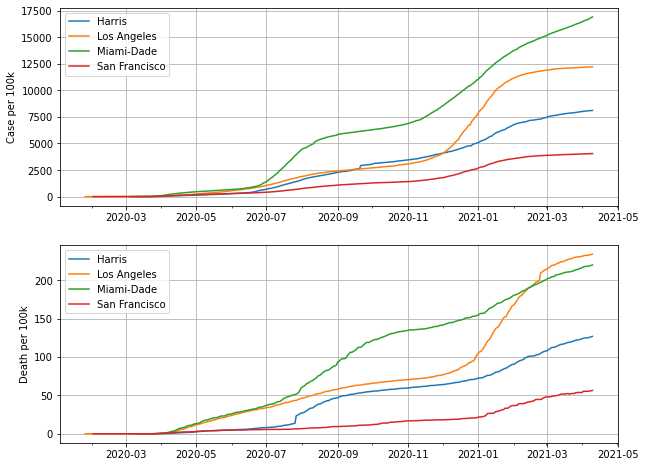

In [86]:
# create plot data to show the trend of normalized cases
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
case_df = plot_df.pivot(index='datetime', columns='county', values='cases_normalized')

case_df.plot(ax=axes[0])
ticklabels = [item.strftime('%Y-%m') for item in case_df.index]
ticklabels = list(set(ticklabels))
ticklabels.sort()
ticklabels = ticklabels[2::2] + ['2021-05']


axes[0].xaxis.set_major_locator(mdates.MonthLocator(interval=2))
axes[0].xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
axes[0].set_xlabel('')
axes[0].set_ylabel('Case per 100k')
axes[0].grid()
axes[0].legend()
axes[0].autoscale(True)

# create plot data to show the trend of normalized deaths
death_df = plot_df.pivot(index='datetime', columns='county', values='deaths_normalized')
death_df.plot(ax=axes[1])
axes[1].xaxis.set_major_locator(mdates.MonthLocator(interval=2))
axes[1].xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
axes[1].set_xlabel('')
axes[1].set_ylabel('Death per 100k')
axes[1].grid()
axes[1].legend()
axes[1].autoscale(True)

plt.show()